#Proyecto Final: Machine Learning Agosto-Diciembre 2023
*Saúl Ruano Sánchez NUA: 435719*

* [Introducción]
* [Planteamiento del Problema]
  * Elección de Datos.
  * Carga de Datos.
* [Elección de Arquitectura]
  * Implementación del Modelo.
  * Resumen del Modelo.
  * Entrenamiento.
* Discusión de Resultados.
*

<a class="anchor" id="introduccion"></a>
#Introducción

In [1]:
#Importamos la Librerias
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Creamos una función para leer las imagenes del dataset
from PIL import Image
import os


def read_images(directory_path):
    image_list = []
    for filename in os.listdir(directory_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory_path, filename)
            image = Image.open(img_path)
            image = image.resize((64,64))
            image_array = np.array(image)
            image_list.append(image_array)
    return np.array(image_list)


directory_path = '/content/drive/MyDrive/Data/Face Mask Dataset/Train/WithMask'
images_with_mask = read_images(directory_path)
directory_path = '/content/drive/MyDrive/Data/Face Mask Dataset/Train/WithoutMask'
images_without_mask = read_images(directory_path)
#Codigo Potter

In [3]:
y_yes = np.ones(images_with_mask.shape[0])
y_no = np.zeros(images_without_mask.shape[0])

y = np.hstack([y_yes, y_no])
y.shape

(10000,)

In [4]:
x_train = np.vstack([images_with_mask, images_without_mask])

In [5]:
from tensorflow import keras
from keras import layers

# LeNet5

In [19]:
#LeNet5

lenet = keras.models.Sequential([
    layers.Conv2D(6, 5, activation='relu', padding='same',
                        input_shape=[64, 64, 3]),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(16, 5, strides=(1,1), activation = 'relu', padding='valid'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),
    layers.Conv2D(120, 5, padding = 'valid', activation = 'relu'),
    layers.Flatten(),
    layers.Dense(84, activation='relu'),
    layers.Dense(1, activation='sigmoid')

])


In [20]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 32, 32, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 14, 14, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 120)       48120     
                                                                 
 flatten_1 (Flatten)         (None, 12000)            

In [21]:
lenet.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [22]:
lenet.fit(x_train, y, epochs=5)

Epoch 1/5
313/313 [==============================] - 4s 7ms/step - loss: 0.9385 - accuracy: 0.9492
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0640 - accuracy: 0.9785
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0484 - accuracy: 0.9822
Epoch 4/5
313/313 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0828 - accuracy: 0.9807


In [26]:
x_test_mask = read_images('/content/drive/MyDrive/Data/Face Mask Dataset/Test/WithMask')
x_test_wmask = read_images('/content/drive/MyDrive/Data/Face Mask Dataset/Test/WithoutMask')

x_test = np.vstack([x_test_mask, x_test_wmask])

y_test_yes = np.ones(x_test_mask.shape[0])
y_test_no = np.zeros(x_test_wmask.shape[0])

y_test = np.hstack([y_test_yes, y_test_no])

In [28]:
lenet.evaluate(x_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.1266 - accuracy: 0.9627


[0.12664301693439484, 0.9627016186714172]

In [29]:
y_predict = lenet.predict(x_test)

31/31 [==============================] - 0s 3ms/step


In [30]:
index_array = np.arange(len(x_test))
np.random.shuffle(index_array)

# Use the shuffled index array to shuffle both images and labels
shuffled_images = x_test[index_array]
shuffled_labels = y_predict[index_array]
shuffled_good_labels = y_test[index_array]

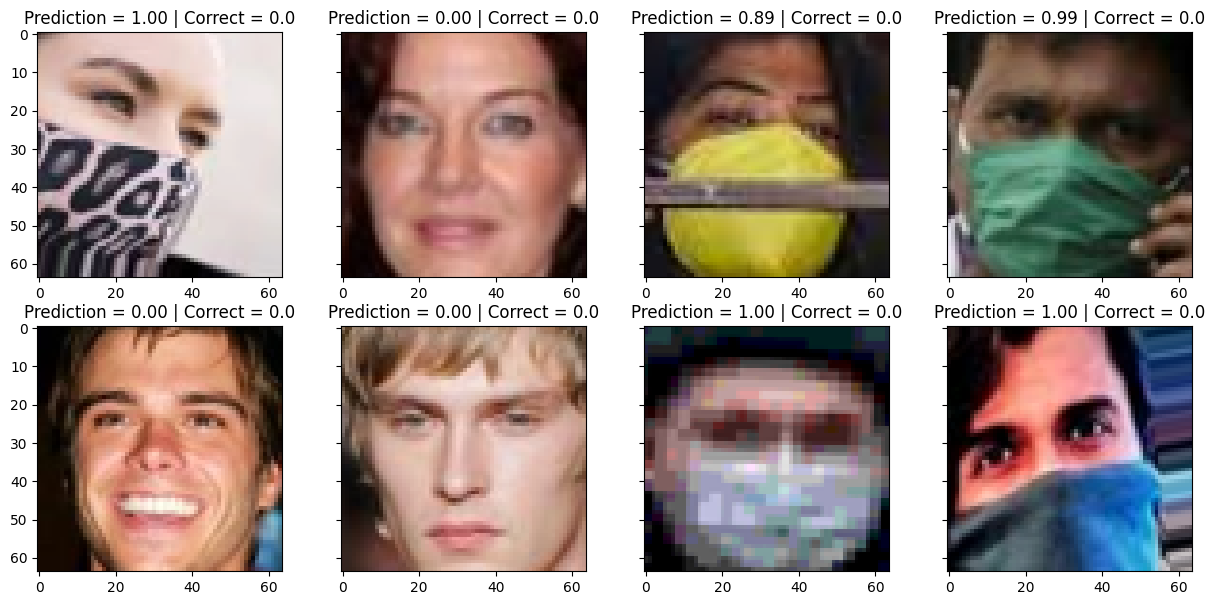

In [17]:


fig, ax = plt.subplots(ncols=4, nrows=2, figsize = (15, 7), sharey=True)

aux = 0

for i in range(8):
  if i < 4:
    image = shuffled_images[i]
    ax[0][i].imshow(image)
    ax[0][i].set_title(f'Prediction = {float(shuffled_labels[i]):.2f} | Correct = {shuffled_good_labels[i]}')
  else:
    image = shuffled_images[i]
    ax[1][i-4].imshow(image)
    ax[1][i-4].set_title(f'Prediction = {float(shuffled_labels[i]):.2f} | Correct = {shuffled_good_labels[i]}')



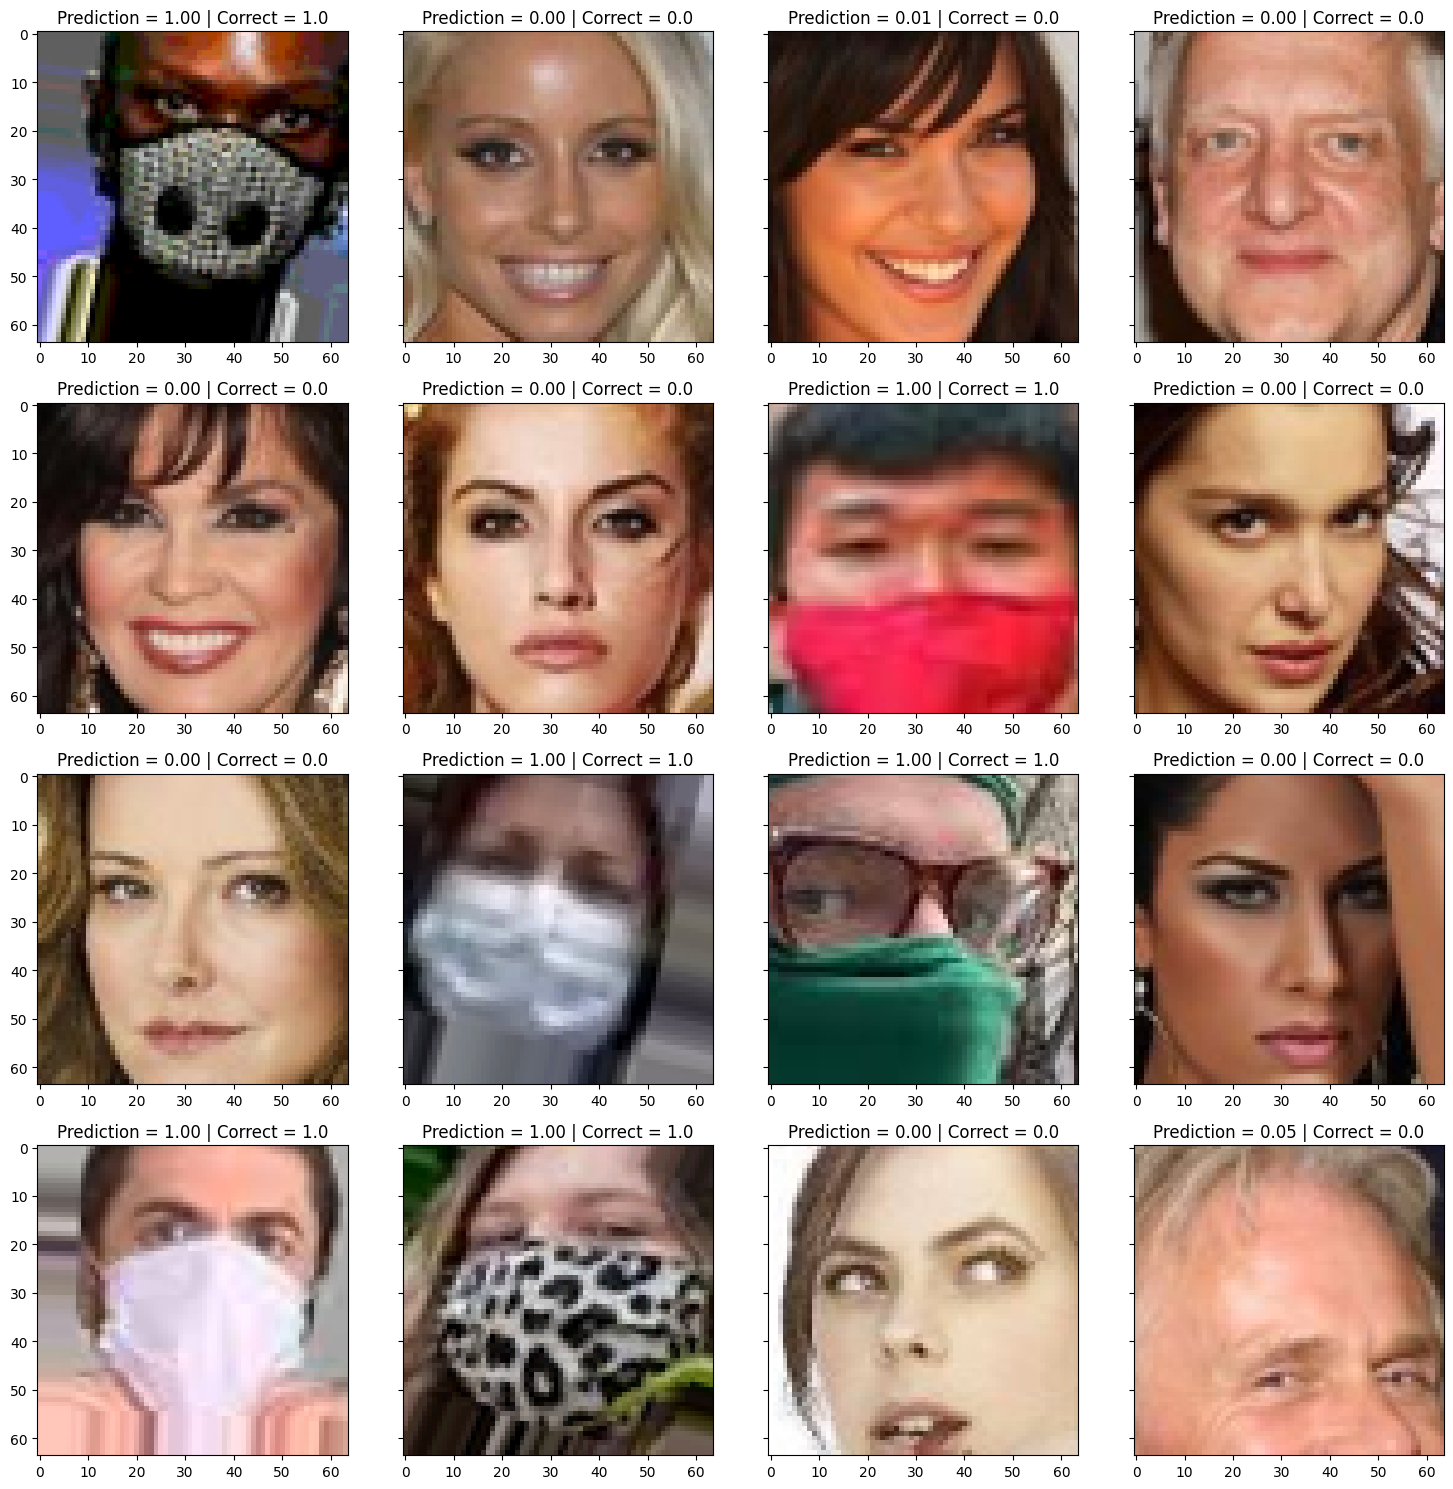

In [31]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 15), sharey=True)

for i in range(16):
    image = shuffled_images[i]
    row = i // 4
    col = i % 4 #Potter
    ax[row][col].imshow(image)
    ax[row][col].set_title(f'Prediction = {float(shuffled_labels[i]):.2f} | Correct = {shuffled_good_labels[i]}')

plt.tight_layout()
plt.show()
#Codigo hecho por Saul